# BST plots

In [1]:
from sst_bst import BSTs
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
def P2dB(X): 
    return 10*np.log10(X+1e-3)

In [36]:
START_TIME="2022-12-30 08:00:00"
END_TIME=  "2022-12-30 14:00:00"
#START_TIME="2022-12-23 08:00:00"
#END_TIME=  "2022-12-23 14:00:01"
tstart=datetime.fromisoformat(START_TIME) 
step_sec=10;
step_min=step_sec/60;
filename="BST_%s_%s_%is.npy"%(START_TIME,END_TIME,step_sec)
bst=BSTs('bst') #start 11-25 11:58
try:
    D=np.load(filename)
except:
    
    tend  =datetime.fromisoformat(END_TIME)
    D=bst.getData_percentile(tstart,tend,step_sec,percentile=30) 
    np.save(filename,D)
finally:
    print(D.shape)

Load BST bst/BST_2022-12-30-07-24-56.h5
Load BST bst/BST_2022-12-30-08-24-56.h5
Load BST bst/BST_2022-12-30-09-24-56.h5
Load BST bst/BST_2022-12-30-10-24-56.h5
Load BST bst/BST_2022-12-30-11-24-56.h5
Load BST bst/BST_2022-12-30-12-24-56.h5
Load BST bst/BST_2022-12-30-13-24-56.h5
(2160, 2, 976)


In [37]:
filename="LBA_%s_%s_%is.npy"%(START_TIME,END_TIME,step_sec)
from sst_bst_2 import SSTs
sst=SSTs('sst') #sst directoty
input_label = ['L72_X', 'L72_Y', 'L77_X', 'L77_Y', 'L83_X', 'L83_Y', 'L88_X', 'L88_Y', 'L90_X', 'L90_Y', 'L92_X', 'L92_Y', 'L93_X', 'L93_Y', 'L94_X', 'L94_Y', 'L95_X', 'L95_Y']
sst.input_label=input_label
sis=range(18); #signal inputs
try: 
    sst.D=np.load(filename)
except:
    tstart=datetime.fromisoformat(START_TIME) 
    tend  =datetime.fromisoformat(END_TIME)
    sst.getData_percentile(tstart,tend,sis,step_sec) 
    np.save(filename,sst.D)
finally:
    print(sst.D.shape)

Load SST sst/SST_2022-12-30-07-24-40.h5
Load SST sst/SST_2022-12-30-08-24-40.h5
Load SST sst/SST_2022-12-30-09-24-40.h5
Load SST sst/SST_2022-12-30-10-24-40.h5
Load SST sst/SST_2022-12-30-11-24-40.h5
Load SST sst/SST_2022-12-30-12-24-40.h5
Load SST sst/SST_2022-12-30-13-24-40.h5
(2160, 18, 512)


(2160, 2, 976) 225 481
(2160, 2, 256)


(0.0, 100.0)

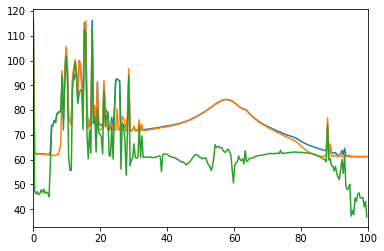

In [38]:
Nstart=225
Nstop=Nstart+512//2
print(D.shape,Nstart,Nstop)
Ds=D.shape
D2=(D.reshape([Ds[0],2,488,2])[:,:,Nstart:Nstop,0])
freq=np.arange(0,512,2)/512*100
print(D2.shape)
Da=D2[0,0,:]
Db=(np.sum(sst.D[0,::2,::2],axis=0))
plt.plot(freq,P2dB(Da))
plt.plot(freq,P2dB(Db))
plt.plot(freq,P2dB(np.abs(Da-Db)))
plt.xlim(0,100)


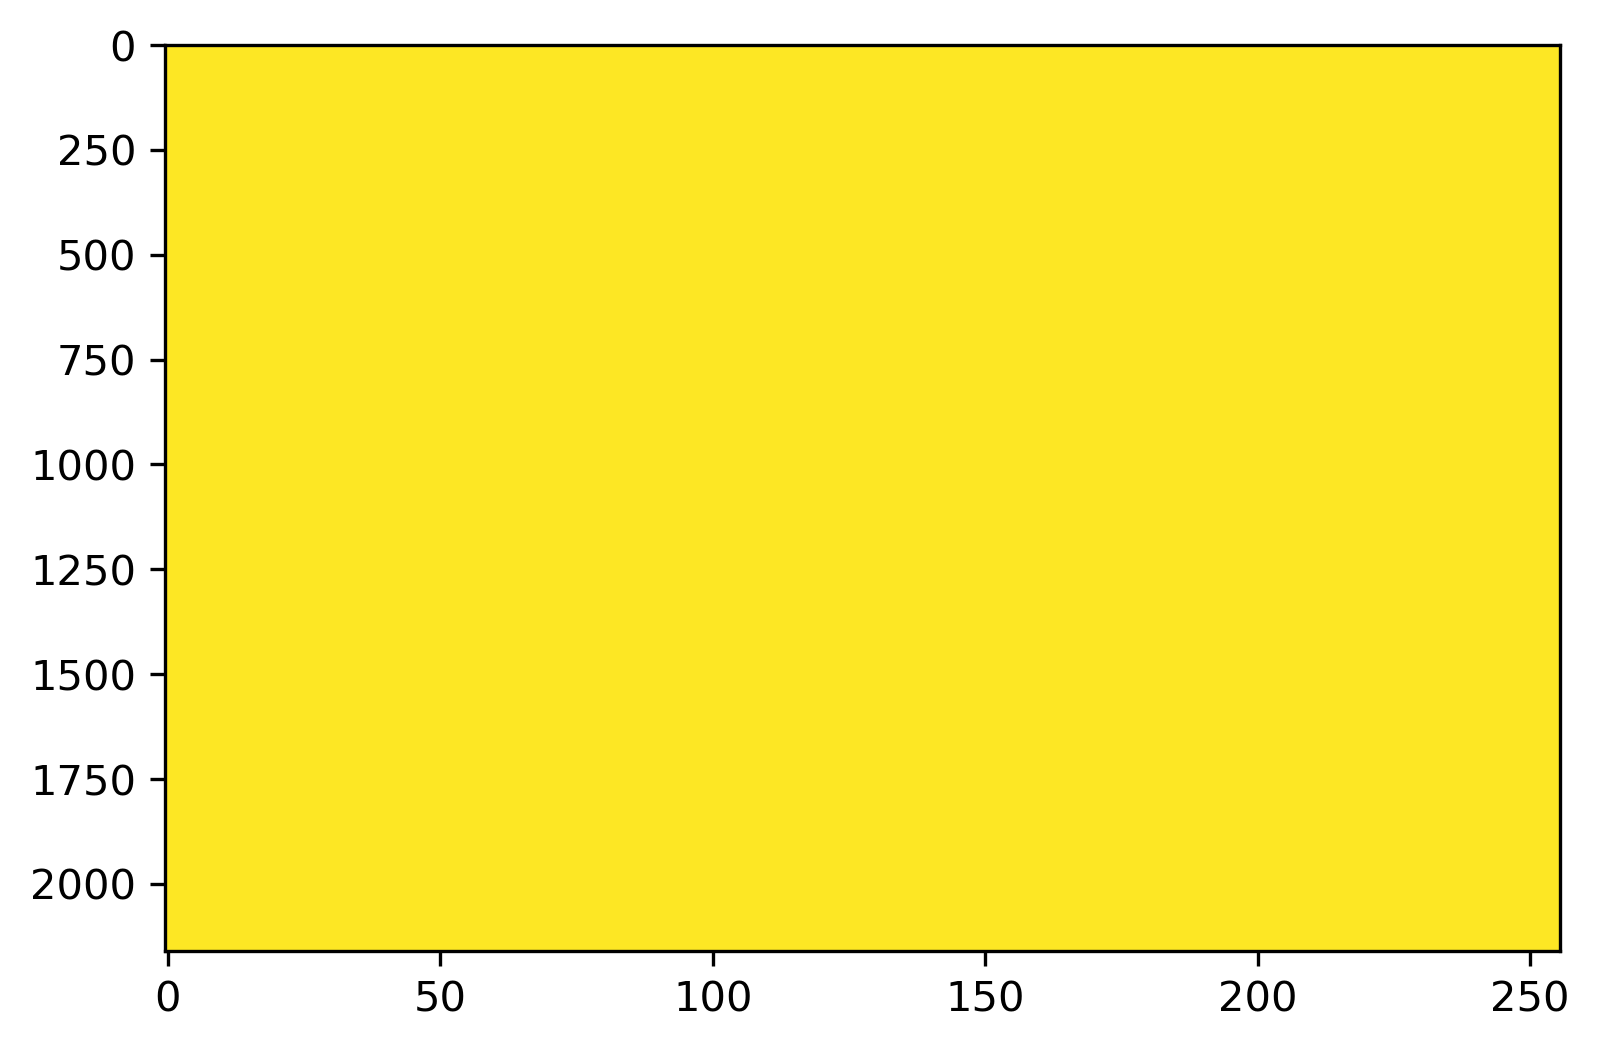

In [39]:
plt.figure(dpi=300)
plt.imshow(D2[:,0,:],vmax=90,vmin=70,aspect='auto')

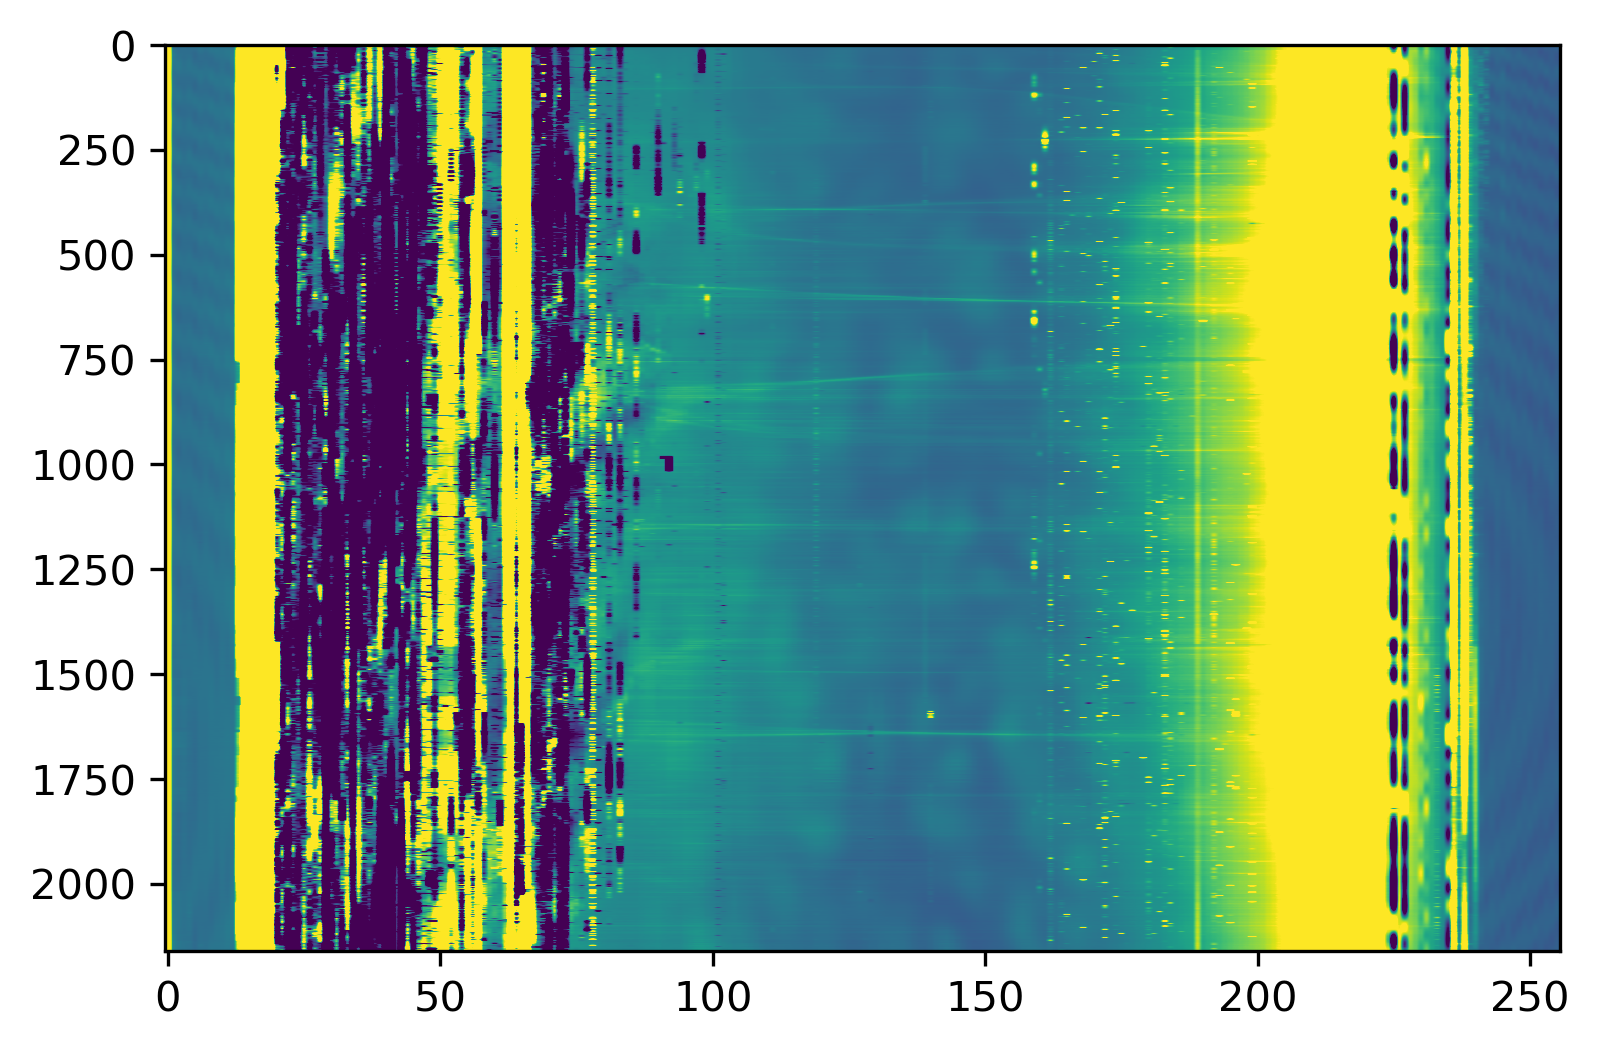

In [40]:
Da=D2[:,0,:]
Db=(np.sum(sst.D[:,::2,::2],axis=1))
#Dc=P2dB(np.abs(Da-Db))
Dc=((Da-Db)/(Da+Db))
#Dc=np.abs(P2dB(Da)-P2dB(Db))
plt.figure(dpi=300)
plt.imshow(Dc,vmax=0.2,vmin=-0.1,aspect='auto')
#plt.imshow(Dc,aspect='auto')
#plt.plot(freq,((Da[0]-Db[0])/(Da[0]+Db[0])))
#plt.plot(freq,np.abs(P2dB(Da[0])-P2dB(Db[0])))
#plt.ylim(50,100)

(30.0, 80.0)

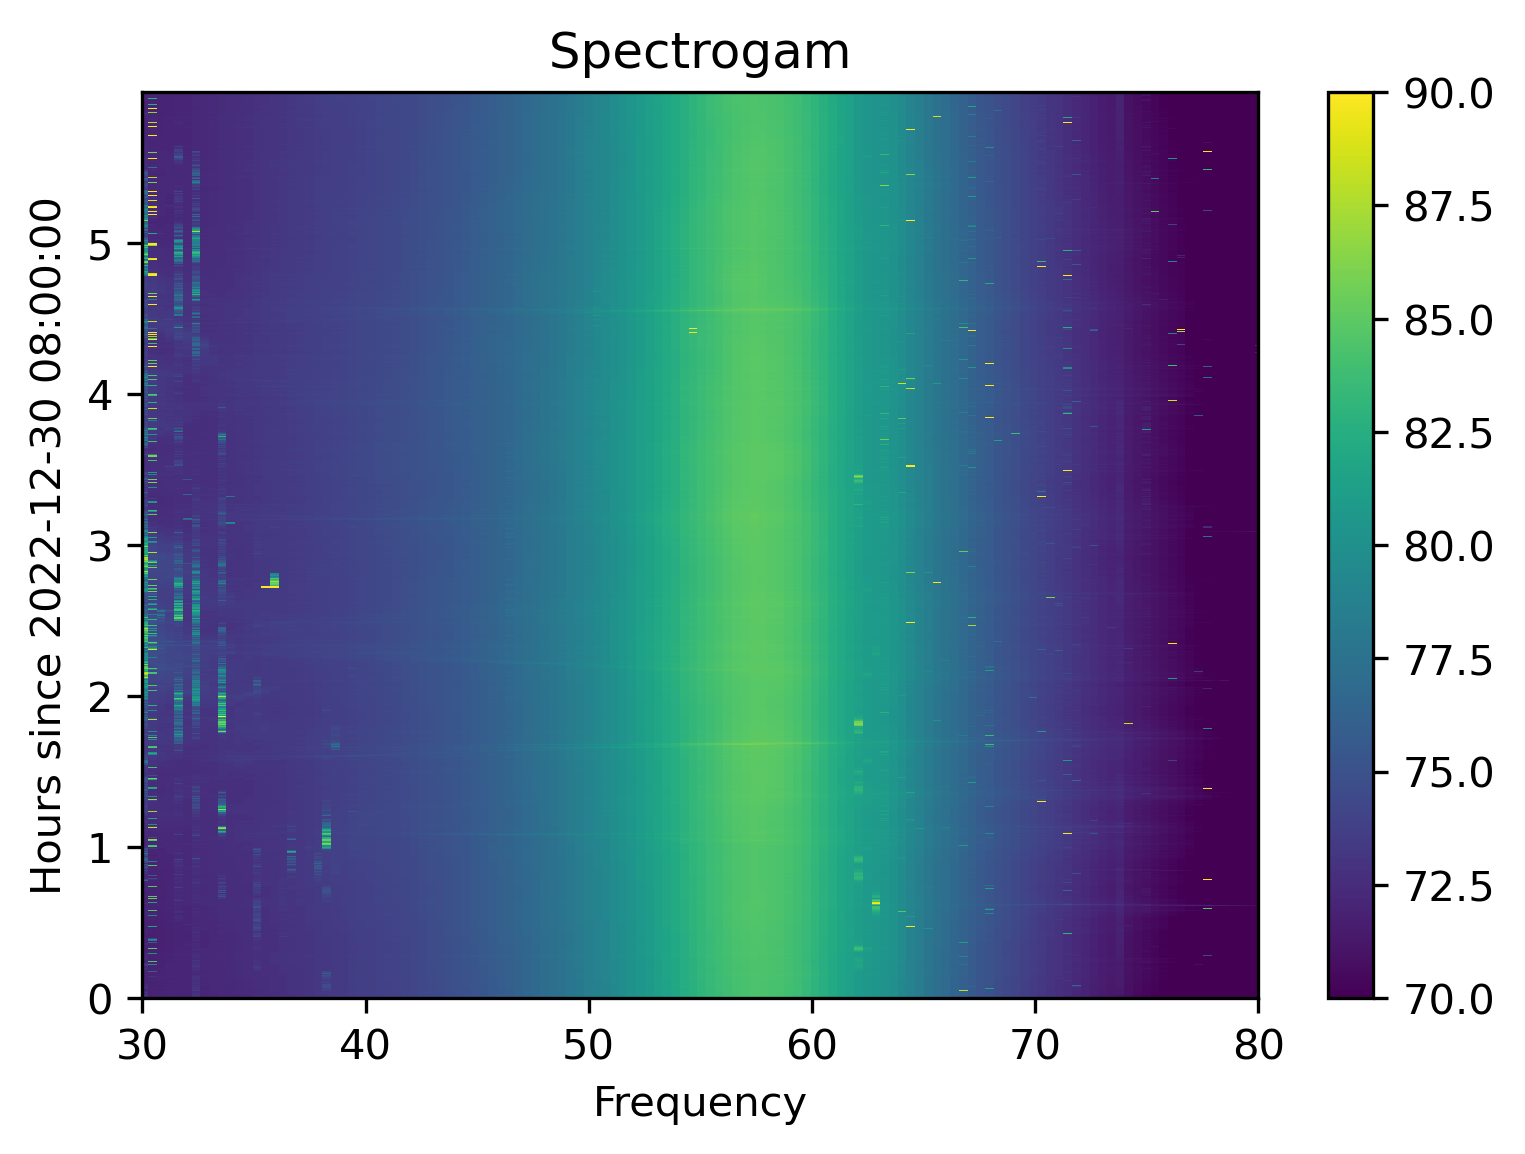

In [48]:
hour_of_day=np.arange(D.shape[0])*step_sec/60/60
GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
yas=hour_of_day
lba_si_nr = 0
plt.figure(dpi=300)
#plt.imshow(10*np.log10(D[:,1,:])-GainADC,vmin=-80,vmax=-60)
yas = hour_of_day #range(len(D[:,1,1]))
plt.pcolor(freq, yas, P2dB(D2[:,lba_si_nr,:])) #,vmin=-80,vmax=-60)
plt.colorbar()
plt.xlabel('Frequency')
plt.ylabel('Hours since ' + START_TIME)
plt.clim([70, 90])
plt.title(f" Spectrogam ")
#plt.savefig("./results/sst_lba_waterval.png")
#plt.ylim(180,200)
plt.xlim(30,80)
#plt.ylim(0.6,0.65)

(30.0, 75.0)

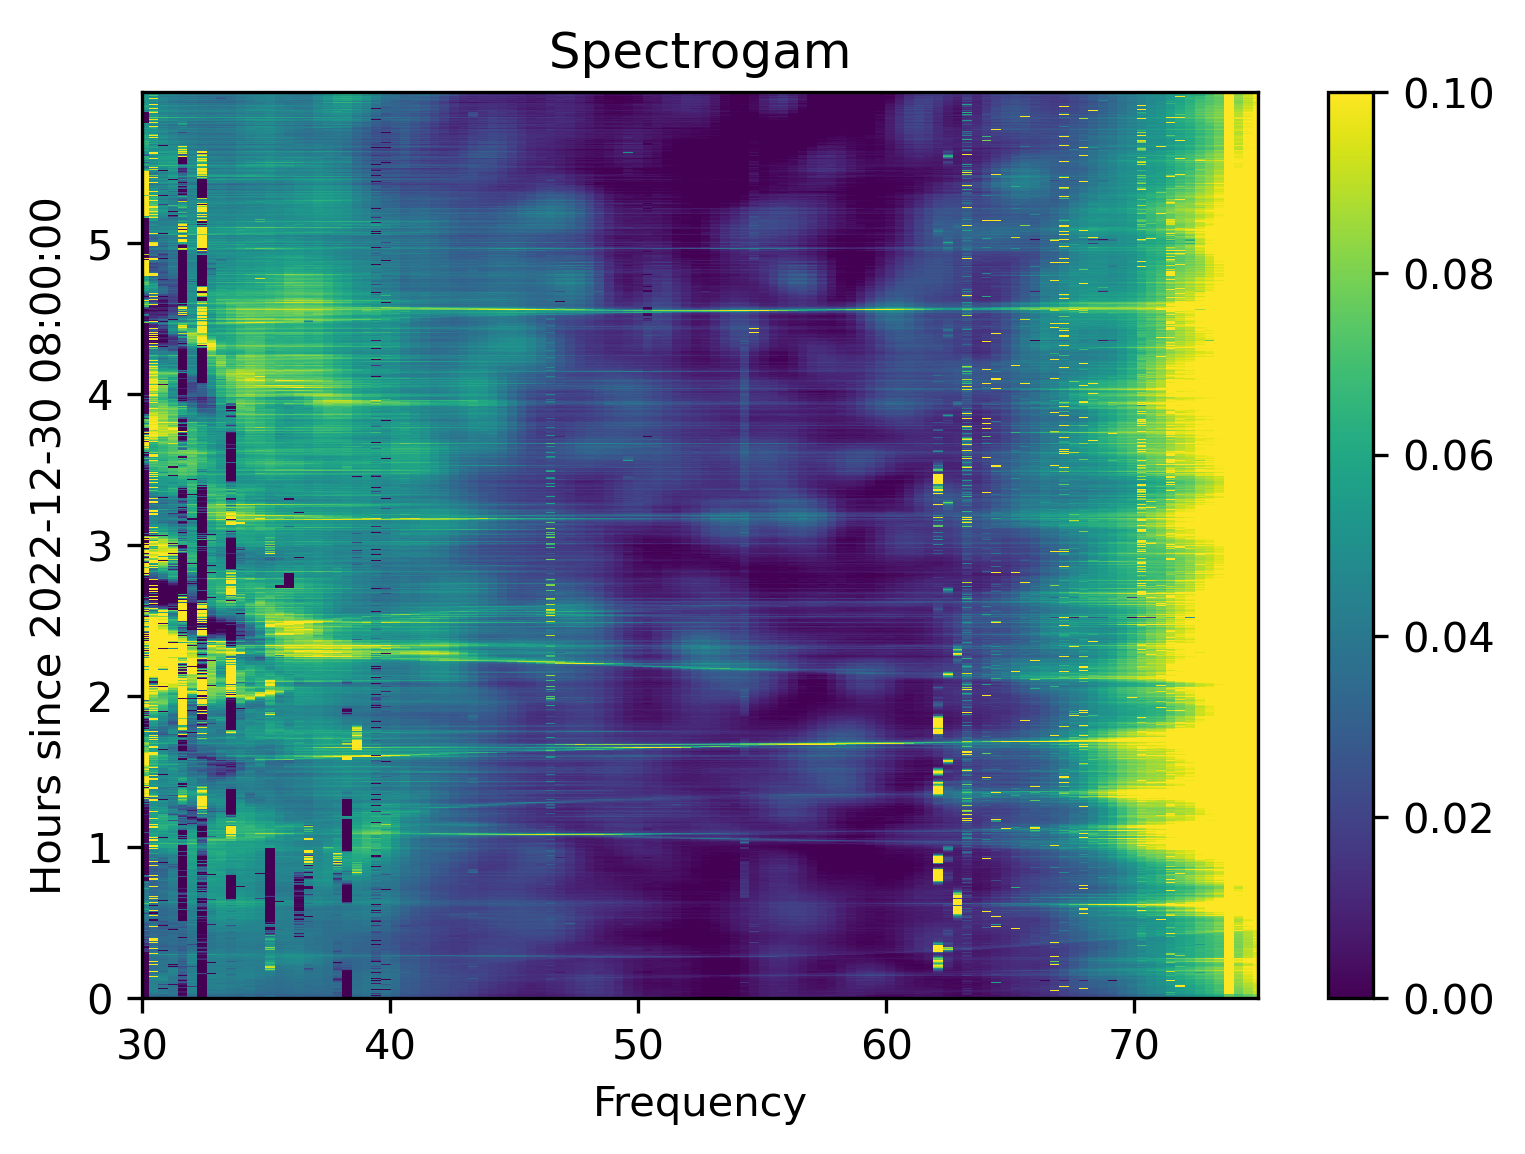

In [53]:
plt.figure(dpi=300)
#plt.imshow(10*np.log10(D[:,1,:])-GainADC,vmin=-80,vmax=-60)
yas = hour_of_day #range(len(D[:,1,1]))
plt.pcolor(freq, yas, (Dc)) #,vmin=-80,vmax=-60)
plt.colorbar()
plt.xlabel('Frequency')
plt.ylabel('Hours since ' + START_TIME)
plt.clim([-0.0, 0.1])
plt.title(f" Spectrogam ")
#plt.savefig("./results/sst_lba_waterval.png")
#plt.ylim(180,200)
plt.xlim(30,75)
#plt.ylim(3,4)

(0.6, 0.65)

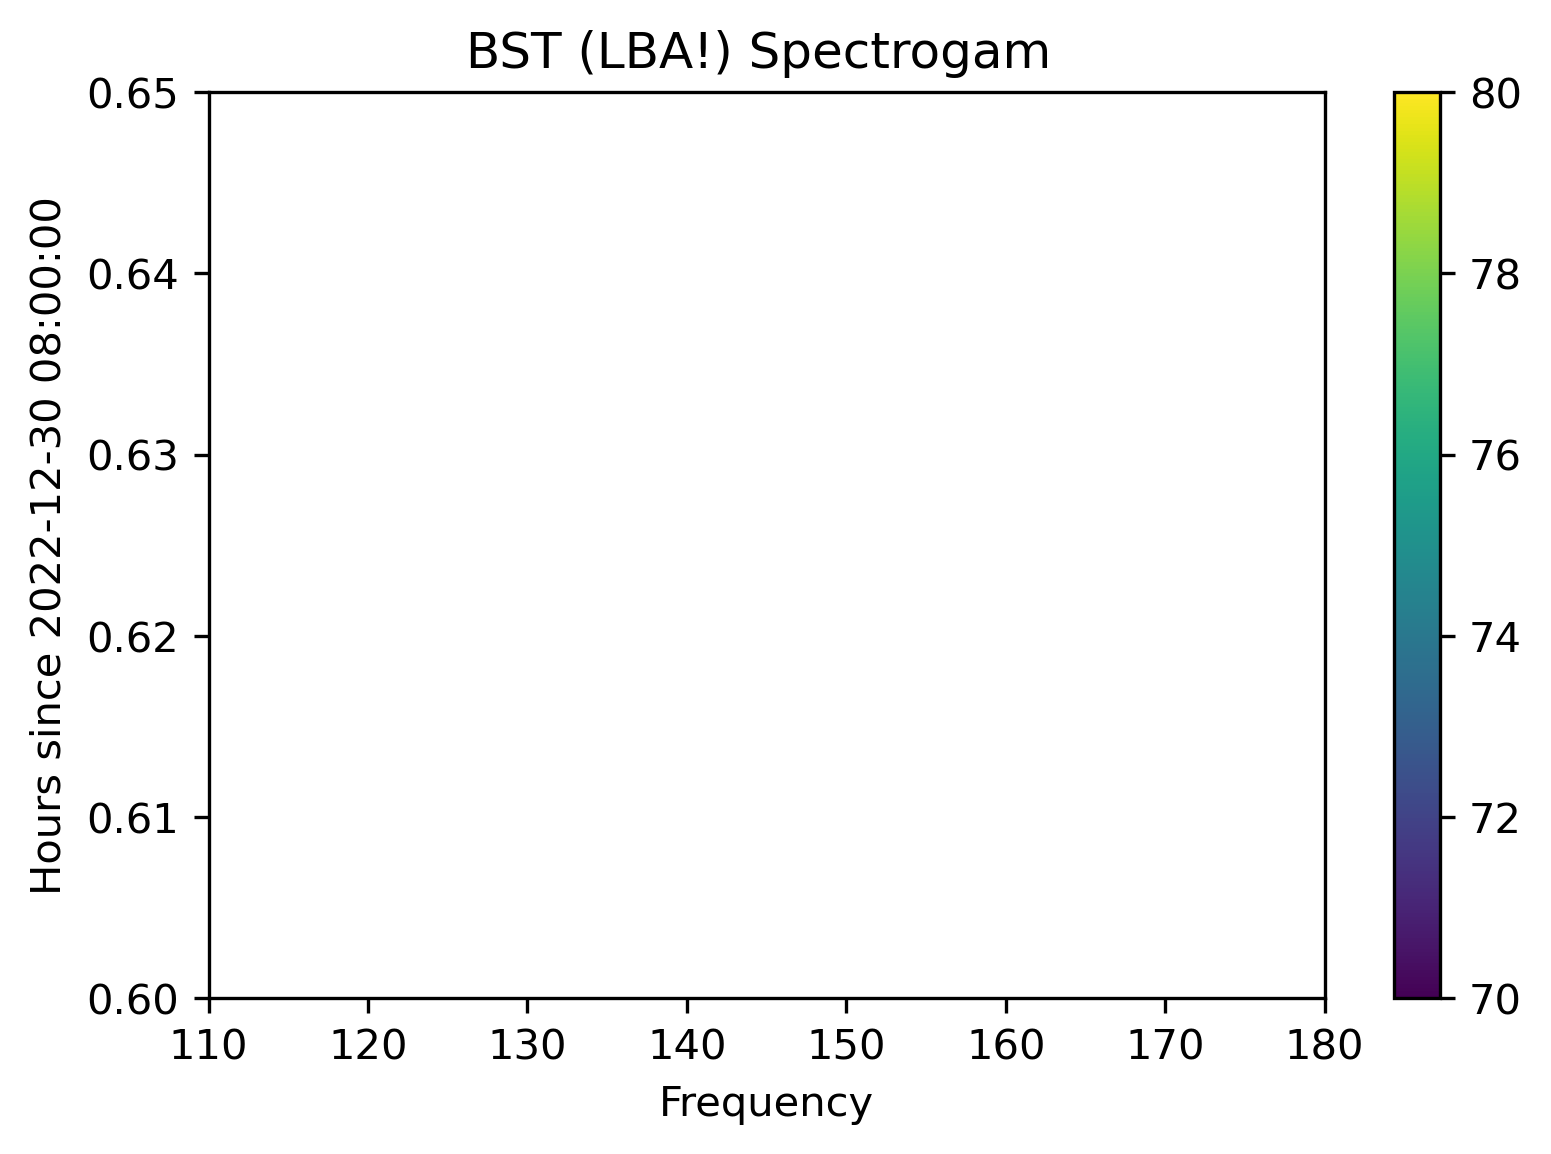

In [43]:
#hour_of_day=np.arange(D.shape[0])/60/60#*tstep_min
#GainADC=(10*np.log10(100e6)+20*np.log10(2**12)) #XST to dBFS
#yas=hour_of_day
lba_si_nr = 0
plt.figure(dpi=300)
#plt.imshow(10*np.log10(D[:,1,:])-GainADC,vmin=-80,vmax=-60)
yas = hour_of_day #range(len(D[:,1,1]))
plt.pcolor(200-freq, yas[2000:3000], (D2[2000:3000,lba_si_nr,:])) #,vmin=-80,vmax=-60)
plt.colorbar()
plt.xlabel('Frequency')
plt.ylabel('Hours since ' + START_TIME)
plt.clim([70, 80])
plt.title(f"BST (LBA!) Spectrogam ")
#plt.savefig("./results/sst_lba_waterval.png")
#plt.ylim(180,200)
plt.xlim(110,180)
plt.ylim(3,4)